# WeatherPy
----

### Analysis

* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import json
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print(api_key)

### Initiate Lists to Store Responses

* Ensure random combinations of coordinates are stored in a list using numpy
* Based upon coord, ensure cities are stored in a list using citipy
* Print the total count of cities to check if sufficient (at least 500)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Create Query URL

In [3]:
# Declare the querying URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = base_url +"appid="+ api_key + "&units="+ units +"&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=&units=imperial&q='

### Perform API Calls

* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [5]:
## DO NOT RUN THIS CELL AFTER INITIALLY EXECUTING
# Set City Count vars

citycount = 0
citycountfail = 0

# Create Lists for Each Column 

city_list = []         
cloudiness = []   
country = []      
date = []         
humidity = []    
lat = []          
lng = []          
MaxTemp = []      
WindSpeed = []  


for city in cities:

    citycount = citycount + 1
    
    print("Retrieving data for index " + str(citycount) + " " + city)
    
    try:
        weatherdetails = requests.get(query_url + city).json()
        city_list.append (weatherdetails["name"])
        cloudiness.append (weatherdetails["clouds"]["all"])
        country.append (weatherdetails["sys"]["country"])
        date.append (weatherdetails["dt"])
        humidity.append (weatherdetails["main"]["humidity"])
        lat.append (weatherdetails["coord"]["lat"])
        lng.append (weatherdetails["coord"]["lon"])
        MaxTemp.append (weatherdetails["main"]["temp_max"])
        WindSpeed.append (weatherdetails["wind"]["speed"])
        
    except:
        citycountfail = citycountfail + 1
        print("Error retrieving data for " + city)
        print("Error Code: " + str(weatherdetails ['cod']))
#        print("Message: " + weatherdetails['message'])

pprint(weatherdetails)        
print("Data Retrieval Complete....")
print("---------------------------------------------------------")
print("Number of cities weather data  not found: " + str(citycountfail))   

Retrieving data for index 1 tilsonburg
Error retrieving data for tilsonburg
Error Code: 401
Retrieving data for index 2 hilo
Error retrieving data for hilo
Error Code: 401
Retrieving data for index 3 bengkulu
Error retrieving data for bengkulu
Error Code: 401
Retrieving data for index 4 marawi
Error retrieving data for marawi
Error Code: 401
Retrieving data for index 5 bandar-e lengeh
Error retrieving data for bandar-e lengeh
Error Code: 401
Retrieving data for index 6 shingu
Error retrieving data for shingu
Error Code: 401
Retrieving data for index 7 kargat
Error retrieving data for kargat
Error Code: 401
Retrieving data for index 8 mataura
Error retrieving data for mataura
Error Code: 401
Retrieving data for index 9 celestun
Error retrieving data for celestun
Error Code: 401
Retrieving data for index 10 hobart
Error retrieving data for hobart
Error Code: 401
Retrieving data for index 11 taolanaro
Error retrieving data for taolanaro
Error Code: 401
Retrieving data for index 12 atuona


Error retrieving data for elko
Error Code: 401
Retrieving data for index 95 boguchany
Error retrieving data for boguchany
Error Code: 401
Retrieving data for index 96 kedrovoye
Error retrieving data for kedrovoye
Error Code: 401
Retrieving data for index 97 paamiut
Error retrieving data for paamiut
Error Code: 401
Retrieving data for index 98 petropavlovsk-kamchatskiy
Error retrieving data for petropavlovsk-kamchatskiy
Error Code: 401
Retrieving data for index 99 khatanga
Error retrieving data for khatanga
Error Code: 401
Retrieving data for index 100 nizhnyaya tavda
Error retrieving data for nizhnyaya tavda
Error Code: 401
Retrieving data for index 101 lompoc
Error retrieving data for lompoc
Error Code: 401
Retrieving data for index 102 honiara
Error retrieving data for honiara
Error Code: 401
Retrieving data for index 103 paita
Error retrieving data for paita
Error Code: 401
Retrieving data for index 104 east london
Error retrieving data for east london
Error Code: 401
Retrieving dat

Error retrieving data for mys shmidta
Error Code: 401
Retrieving data for index 185 hermanus
Error retrieving data for hermanus
Error Code: 401
Retrieving data for index 186 lebu
Error retrieving data for lebu
Error Code: 401
Retrieving data for index 187 ponta do sol
Error retrieving data for ponta do sol
Error Code: 401
Retrieving data for index 188 langsa
Error retrieving data for langsa
Error Code: 401
Retrieving data for index 189 beira
Error retrieving data for beira
Error Code: 401
Retrieving data for index 190 silva jardim
Error retrieving data for silva jardim
Error Code: 401
Retrieving data for index 191 yinchuan
Error retrieving data for yinchuan
Error Code: 401
Retrieving data for index 192 houston
Error retrieving data for houston
Error Code: 401
Retrieving data for index 193 tiznit
Error retrieving data for tiznit
Error Code: 401
Retrieving data for index 194 mitsamiouli
Error retrieving data for mitsamiouli
Error Code: 401
Retrieving data for index 195 pangnirtung
Error 

Error retrieving data for taltal
Error Code: 401
Retrieving data for index 277 praya
Error retrieving data for praya
Error Code: 401
Retrieving data for index 278 mogadishu
Error retrieving data for mogadishu
Error Code: 401
Retrieving data for index 279 san juan
Error retrieving data for san juan
Error Code: 401
Retrieving data for index 280 marrakesh
Error retrieving data for marrakesh
Error Code: 401
Retrieving data for index 281 kamenskoye
Error retrieving data for kamenskoye
Error Code: 401
Retrieving data for index 282 punta ocote
Error retrieving data for punta ocote
Error Code: 401
Retrieving data for index 283 sangar
Error retrieving data for sangar
Error Code: 401
Retrieving data for index 284 erenhot
Error retrieving data for erenhot
Error Code: 401
Retrieving data for index 285 sola
Error retrieving data for sola
Error Code: 401
Retrieving data for index 286 saldanha
Error retrieving data for saldanha
Error Code: 401
Retrieving data for index 287 makakilo city
Error retriev

Error retrieving data for saint-paul
Error Code: 401
Retrieving data for index 369 oktyabrskoye
Error retrieving data for oktyabrskoye
Error Code: 401
Retrieving data for index 370 maamba
Error retrieving data for maamba
Error Code: 401
Retrieving data for index 371 banamba
Error retrieving data for banamba
Error Code: 401
Retrieving data for index 372 port lincoln
Error retrieving data for port lincoln
Error Code: 401
Retrieving data for index 373 swan hill
Error retrieving data for swan hill
Error Code: 401
Retrieving data for index 374 dombarovskiy
Error retrieving data for dombarovskiy
Error Code: 401
Retrieving data for index 375 charters towers
Error retrieving data for charters towers
Error Code: 401
Retrieving data for index 376 leh
Error retrieving data for leh
Error Code: 401
Retrieving data for index 377 tumannyy
Error retrieving data for tumannyy
Error Code: 401
Retrieving data for index 378 mbanza-ngungu
Error retrieving data for mbanza-ngungu
Error Code: 401
Retrieving da

Error retrieving data for vestmanna
Error Code: 401
Retrieving data for index 461 ushibuka
Error retrieving data for ushibuka
Error Code: 401
Retrieving data for index 462 natal
Error retrieving data for natal
Error Code: 401
Retrieving data for index 463 azimur
Error retrieving data for azimur
Error Code: 401
Retrieving data for index 464 fortuna
Error retrieving data for fortuna
Error Code: 401
Retrieving data for index 465 krasnoselkup
Error retrieving data for krasnoselkup
Error Code: 401
Retrieving data for index 466 katherine
Error retrieving data for katherine
Error Code: 401
Retrieving data for index 467 lala
Error retrieving data for lala
Error Code: 401
Retrieving data for index 468 savannah bight
Error retrieving data for savannah bight
Error Code: 401
Retrieving data for index 469 dogondoutchi
Error retrieving data for dogondoutchi
Error Code: 401
Retrieving data for index 470 port elizabeth
Error retrieving data for port elizabeth
Error Code: 401
Retrieving data for index 

Error retrieving data for itoman
Error Code: 401
Retrieving data for index 551 mananjary
Error retrieving data for mananjary
Error Code: 401
Retrieving data for index 552 fushan
Error retrieving data for fushan
Error Code: 401
Retrieving data for index 553 ayer molek
Error retrieving data for ayer molek
Error Code: 401
Retrieving data for index 554 opobo
Error retrieving data for opobo
Error Code: 401
Retrieving data for index 555 dunayivtsi
Error retrieving data for dunayivtsi
Error Code: 401
Retrieving data for index 556 hailar
Error retrieving data for hailar
Error Code: 401
Retrieving data for index 557 aklavik
Error retrieving data for aklavik
Error Code: 401
Retrieving data for index 558 rabo de peixe
Error retrieving data for rabo de peixe
Error Code: 401
Retrieving data for index 559 bairnsdale
Error retrieving data for bairnsdale
Error Code: 401
Retrieving data for index 560 russkaya polyana
Error retrieving data for russkaya polyana
Error Code: 401
Retrieving data for index 5

### Double-Check Lengths 
(Not to exceed 638) (Ensure interrupting kernel didn't cause issues)

In [6]:
print(len(city_list))
print(len(cloudiness))
print(len(country))
print(len(date))
print(len(humidity))
print(len(lat))
print(len(lng))
print(len(MaxTemp))
print(len(WindSpeed))

0
0
0
0
0
0
0
0
0


## Store All Responses in DF

* Then, export into a .csv saved in Resources folder

In [7]:
#Store all responses into a DataFrame 

weather_df = pd.DataFrame ({
    "City": city_list,
    "Cloudiness": cloudiness,
    "Country_code": country,
    "Date": date,
    "Humidity": humidity,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temp": MaxTemp,
    "Wind Speed": WindSpeed
})

weather_df.head()

,City,Cloudiness,Country_code,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Dombasle-sur-Meurthe,0,FR,1554573674,54,48.62,6.35,57.99,9.17
1,Vestmannaeyjar,75,IS,1554570000,85,63.44,-20.27,41.00,23.04
2,Hermanus,0,ZA,1554573656,76,-34.42,19.24,66.00,7.00
3,Cape Town,0,ZA,1554573666,82,-33.93,18.42,69.01,11.41
4,Vaini,0,IN,1554573825,76,15.34,74.49,71.24,2.71


### Export .csv

In [8]:
# Export CSV to crossreference

weather_df.to_csv("weatherdata.csv",index=False,header=True)
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 9 columns):
City            548 non-null object
Cloudiness      548 non-null int64
Country_code    548 non-null object
Date            548 non-null int64
Humidity        548 non-null int64
Latitude        548 non-null float64
Longitude       548 non-null float64
Max Temp        548 non-null float64
Wind Speed      548 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 38.6+ KB


## Create Scatterplots 

* Four scatterplots are created in relation to latitude: 
    - Latitude (lat) vs. Temperature (MaxTemp)
    - Latitude (lat) vs. Humidity (humidity)
    - Latitude (lat) vs. Cloudiness (cloudiness)
    - Latitude (lat) vs. Wind Speed (WindSpeed)

** Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
** Save the plotted figures as .pngs.

### Latitudinal Relationship to Maximum Temperature (CURRENTLY C - CONV TO F)

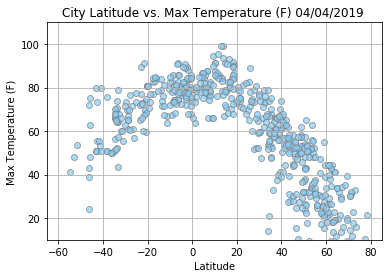

In [27]:
# Create Scatterplots
x_axis = weather_df['Latitude']
plt.xlabel("Latitude")
y_axis_temp = weather_df['Max Temp']
y_axis_humidity = weather_df['Humidity']
y_axis_cloudiness = weather_df['Cloudiness']
y_axis_windspeed = weather_df['Wind Speed']

# Maximum Temperature Relationship
## Currently in C, convert to F

plt.xlim(-65, 85)
plt.ylim(10, 110)
plt.title("City Latitude vs. Max Temperature (F) 04/04/2019 ")
plt.grid()
plt.ylabel("Max Temperature (F)")
plt.scatter(x_axis, y_axis_temp,facecolor="lightskyblue", edgecolor="gray", alpha=.7)

# Save Figure
plt.savefig("../Images/LatitudeVsMaxTemp.png")
plt.show()

### Latitudinal Relationship to Humidity

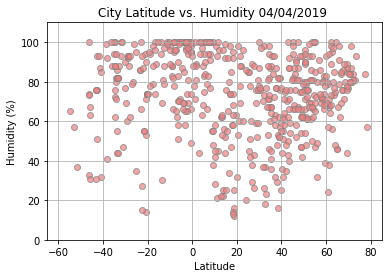

In [30]:
# Humidity Relationship

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-65, 85)
plt.ylim(0, 110)
plt.title("City Latitude vs. Humidity 04/04/2019 ")
plt.grid()
plt.scatter(x_axis, y_axis_humidity,facecolor="lightcoral", edgecolor="gray", alpha=.7)

# Save Figure
plt.savefig("../Images/LatitudeVsHumidityPct.png")
plt.show()

### Latitudinal Relationship to Cloudiness

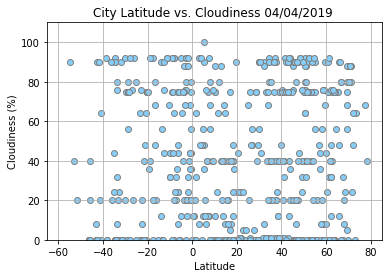

In [31]:
# Cloudiness Relationship

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-65, 85)
plt.ylim(0, 110)
plt.title("City Latitude vs. Cloudiness 04/04/2019 ")
plt.grid()
plt.scatter(x_axis, y_axis_cloudiness,facecolor="lightskyblue", edgecolor="gray")

# Save Figure
plt.savefig("../Images/LatitudeVsCloudinessPct.png")
plt.show()

### Latitudinal Relationship to Wind Speed (MPH)

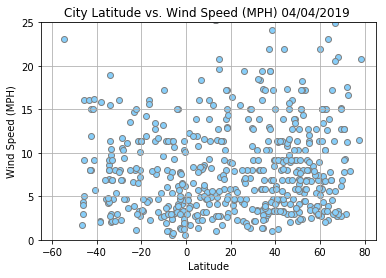

In [32]:
# Wind Speed Relationship 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.xlim(-65, 85)
plt.ylim(0, 25)
plt.title("City Latitude vs. Wind Speed (MPH) 04/04/2019 ")
plt.grid()
plt.scatter(x_axis, y_axis_windspeed,facecolor="lightskyblue", edgecolor="gray")

# Save Figure
plt.savefig("../Images/LatitudeVsWindSpeed.png")
plt.show()